In [444]:
# import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.image as mpimg
import fastf1.plotting
pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows', None)

fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

In [445]:
drivers = pd.read_csv("f1db_csv/drivers.csv")
drivers = drivers[["driverId","number","code","forename","surname"]]
races = pd.read_csv("f1db_csv/races.csv")
races = races.drop(races.columns[[7,8,9,10,11,12,13,14,15,16,17]],axis = 1)
results = pd.read_csv("f1db_csv/results.csv")
qualifying = pd.read_csv("f1db_csv/qualifying.csv")
status = pd.read_csv("f1db_csv/status.csv")
constructors = pd.read_csv("f1db_csv/constructors.csv")
constructors = constructors[["constructorId","name"]]
driver_constructor = pd.read_csv("f1db_csv/driver_constructor.csv")
driver_constructor = driver_constructor.loc[(driver_constructor["year"]==2023)]
constructor_color = pd.read_csv("f1db_csv/constructor_color.csv")
constructor_results = pd.read_csv("f1db_csv/constructor_results.csv")

In [446]:
driver_constructor =  driver_constructor[["driverId","constructorId"]].drop_duplicates().reset_index(drop=True)

In [447]:
winners = results.loc[results["position"]=='1']

In [448]:
winners = winners[["driverId","position"]]

In [449]:
winners = pd.merge(winners,drivers,on='driverId')

In [450]:
topwinners = winners.groupby(["driverId","forename","surname"]).count().sort_values(by='position',ascending=False).head(10)

In [451]:
topwinners = topwinners[["position"]]

In [452]:
topwinners.to_csv('csv_post_socialmedia/winners.csv')

### number of dnfs

In [453]:
results = pd.merge(results,races[["raceId","year","round"]],on="raceId")
results = pd.merge(results,status,on='statusId')

In [454]:
results2022 = results.loc[results["year"]==2022]
results2023 = results.loc[results["year"]==2023]

In [455]:
retire2022 = results2022.loc[(results2022["statusId"]!=1)&(results2022["statusId"]<11)|(results2022["statusId"]>19)].sort_values(by='round')
retire2023 = results2023.loc[(results2023["statusId"]!=1)&(results2023["statusId"]<11)|(results2023["statusId"]>19)].sort_values(by='round')

In [456]:
retire2022 = retire2022[["raceId","constructorId","driverId","number","positionText","statusId","year","round","status"]]
retire2023 = retire2023[["raceId","constructorId","driverId","number","positionText","statusId","year","round","status"]]

In [457]:
retire2022 = retire2022.loc[retire2022["round"]<13]

In [458]:
retire2023 = pd.merge(retire2023,constructors,on='constructorId')
retire2022 = pd.merge(retire2022,constructors,on='constructorId')

In [459]:
# results2023 = results.loc[results["raceId"]>=1098].reset_index(drop=True)

In [460]:
ret2023 = retire2023[["name","year","status"]].groupby(["name","year"]).agg({"status": "count"}).reset_index()

In [461]:
ret2022 = retire2022[["name","year","status"]].groupby(["name","year"]).count().reset_index()

In [462]:
total = pd.concat([ret2022,ret2023], axis=0)
total.to_csv('csv_post_socialmedia/dnfcomp.csv',index=False)

### pitstop

In [463]:
pitstops = pd.read_csv("f1db_csv/pit_stops.csv")
pitstops = pd.merge(pitstops,races[["raceId","year","round"]],on='raceId')
pitstops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds,year,round
0,841,153,1,1,17:05:23,26.898,26898,2011,1
1,841,30,1,1,17:05:52,25.021,25021,2011,1
2,841,17,1,11,17:20:48,23.426,23426,2011,1
3,841,4,1,12,17:22:34,23.251,23251,2011,1
4,841,13,1,13,17:24:10,23.842,23842,2011,1


In [464]:
pitstops2023 = pitstops.loc[pitstops["year"]==2023]
pitstops2023 = pitstops2023.loc[pitstops2023["milliseconds"]<70000].sort_values(by=['round','duration'])

In [465]:
pitstops2023 = pd.merge(pitstops2023,drivers,on='driverId')

In [466]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,round,status
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,Finished
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,2008,1,Finished
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,2008,1,Finished
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,2008,1,Finished
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,2008,1,Finished


In [467]:
pitstops2023 = pd.merge(pitstops2023,driver_constructor[["driverId","constructorId"]],on='driverId')


In [468]:
pitstops2023 = pd.merge(pitstops2023,constructors,on='constructorId')

In [469]:
pitstops2023.head()

,raceId,driverId,stop,lap,time,duration,milliseconds,year,round,number,code,forename,surname,constructorId,name
0,1098,832,2,31,18:55:11,24.227,24227,2023,1,55,SAI,Carlos,Sainz,6,Ferrari
1,1098,832,1,13,18:25:17,24.500,24500,2023,1,55,SAI,Carlos,Sainz,6,Ferrari
2,1099,832,1,15,20:27:49,20.760,20760,2023,2,55,SAI,Carlos,Sainz,6,Ferrari
3,1100,832,1,7,15:15:05,18.319,18319,2023,3,55,SAI,Carlos,Sainz,6,Ferrari
4,1101,832,1,11,15:24:33,21.970,21970,2023,4,55,SAI,Carlos,Sainz,6,Ferrari


In [470]:
pitstops2023 = pitstops2023.sort_values(by='round')[["driverId","number","code","duration","milliseconds","year","round","constructorId","name"]]

In [471]:
pitstops2023.head()

,driverId,number,code,duration,milliseconds,year,round,constructorId,name
0,832,55,SAI,24.227,24227,2023,1,6,Ferrari
220,4,14,ALO,25.800,25800,2023,1,117,Aston Martin
219,4,14,ALO,24.869,24869,2023,1,117,Aston Martin
201,840,18,STR,24.639,24639,2023,1,117,Aston Martin
180,858,2,SAR,25.670,25670,2023,1,3,Williams


In [472]:
avgpitstops2023 = pitstops2023.groupby(["round","constructorId","name"])["milliseconds"].mean().reset_index()


In [473]:
avgpitstops2023 = avgpitstops2023.sort_values(by=["round",'milliseconds'])

In [474]:
avgpitstops2023["seconds"] = avgpitstops2023["milliseconds"]/1000

In [475]:
avgpitstops2023.head(11)

,round,constructorId,name,milliseconds,seconds
2,1,6,Ferrari,24429.000000,24.429000
3,1,9,Red Bull,24638.500000,24.638500
1,1,3,Williams,25124.833333,25.124833
8,1,213,AlphaTauri,25141.800000,25.141800
5,1,117,Aston Martin,25189.250000,25.189250
6,1,131,Mercedes,25210.000000,25.210000
4,1,51,Alfa Romeo,26455.600000,26.455600
7,1,210,Haas F1 Team,27805.333333,27.805333
9,1,214,Alpine F1 Team,31074.333333,31.074333
0,1,1,McLaren,32555.666667,32.555667


In [476]:
compavgpitstop = avgpitstops2023.loc[avgpitstops2023["round"] == 1]
compavgpitstop["gap"] = compavgpitstop["seconds"] - compavgpitstop["seconds"].min()

round_max = avgpitstops2023["round"].max()

for i in range(2, round_max + 1):
    df_round = avgpitstops2023.loc[avgpitstops2023["round"] == i]
    df_round["gap"] = df_round["seconds"] - df_round["seconds"].min()
    compavgpitstop = pd.concat([compavgpitstop, df_round])  # Pass a list of DataFrames to pd.concat



C:\Users\GTR\AppData\Local\Temp\ipykernel_6888\17162067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compavgpitstop["gap"] = compavgpitstop["seconds"] - compavgpitstop["seconds"].min()
C:\Users\GTR\AppData\Local\Temp\ipykernel_6888\17162067.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_round["gap"] = df_round["seconds"] - df_round["seconds"].min()
C:\Users\GTR\AppData\Local\Temp\ipykernel_6888\17162067.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [477]:
compavgpitstop = compavgpitstop.groupby(["constructorId","name"])["gap"].mean().reset_index()
compavgpitstop["gaptime"] = compavgpitstop["gap"]
compavgpitstop["gaptime"] = compavgpitstop["gaptime"] - compavgpitstop["gap"].min()
compavgpitstop = compavgpitstop.sort_values("gaptime")

In [478]:
compavgpitstop

,constructorId,name,gap,gaptime
3,9,Red Bull,0.251847,0.000000
2,6,Ferrari,0.668339,0.416492
6,131,Mercedes,0.775874,0.524027
8,213,AlphaTauri,0.987325,0.735477
5,117,Aston Martin,1.109056,0.857209
9,214,Alpine F1 Team,1.372090,1.120243
4,51,Alfa Romeo,1.831220,1.579373
1,3,Williams,2.041807,1.789960
0,1,McLaren,2.415912,2.164064
7,210,Haas F1 Team,3.423068,3.171221


In [479]:
compavgpitstop = pd.merge(compavgpitstop,constructor_color[["constructorId","color"]],on='constructorId')
compavgpitstop['gaptime'] = compavgpitstop['gaptime'].apply(lambda x: round(x, 3))
compavgpitstop

,constructorId,name,gap,gaptime,color
0,9,Red Bull,0.251847,0.000,#1E41FF
1,6,Ferrari,0.668339,0.416,#DC0000
2,131,Mercedes,0.775874,0.524,#00D2BE
3,213,AlphaTauri,0.987325,0.735,#2B4562
4,117,Aston Martin,1.109056,0.857,#006F62
5,214,Alpine F1 Team,1.372090,1.120,#0090FF
6,51,Alfa Romeo,1.831220,1.579,#900000
7,3,Williams,2.041807,1.790,#005AFF
8,1,McLaren,2.415912,2.164,#FF8700
9,210,Haas F1 Team,3.423068,3.171,#FFFFFF


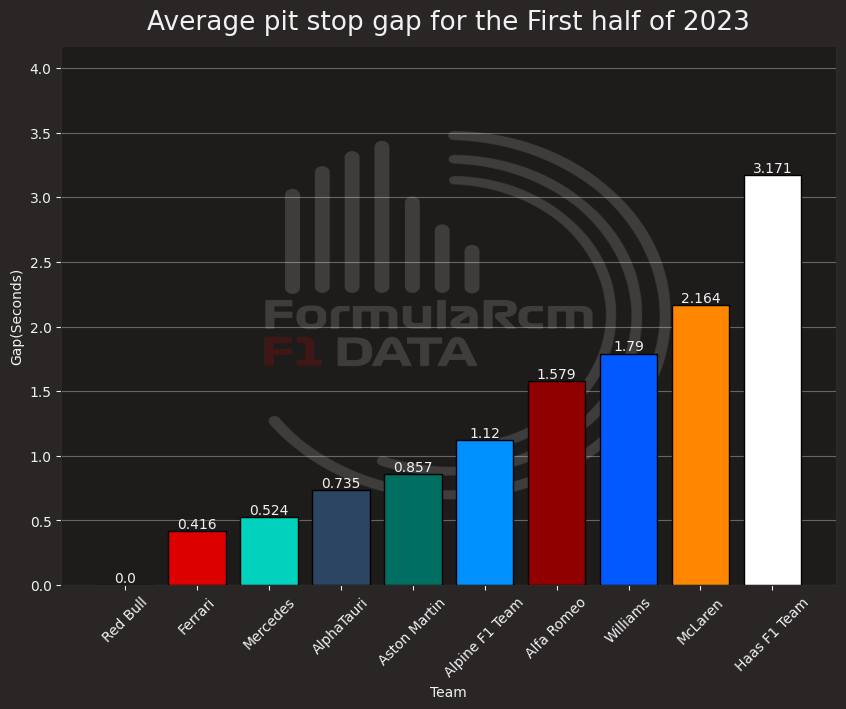

In [480]:
plt.subplots(figsize=(10, 7))
x = compavgpitstop["name"]
y = compavgpitstop["gaptime"]
color = compavgpitstop["color"]

# # Load the logo image
logo_img = mpimg.imread('logo/LogoFomulaRcmDark.png')

# Add the logo above the plot

plt.imshow(logo_img, extent=[0, len(x)-1,0, y.max()+1], aspect='auto', alpha=0.15, zorder=1)
 

# Create the bar plot
bars = plt.bar(x, y ,color = color, zorder=2)

# Add labels and title
plt.xlabel('Team')
plt.ylabel('Gap(Seconds)')
plt.title('Average pit stop gap for the First half of 2023')
# plt.yticks(range(300, 400, 5))
# plt.ylim(300, 340)
# # Add text annotations on top of bars

for i in range(len(x)):
    plt.text(i, y.loc[i], str(y.loc[i]), ha='center', va='bottom')
# Adding borders to the bars
for bar in bars:
    bar.set_edgecolor('black')
    bar.set_linewidth(1)

plt.xticks(rotation=45)

plt.grid(axis='y', alpha=0.5)

# Save the plot as an image file (e.g., PNG)
plt.savefig('Graphes/Other/avg_gap_pitstops.png', dpi=300 ,bbox_inches='tight')  # Change the filename and dpi as needed

# Display the plot
plt.show()



### Average Pitstops team

In [481]:
pitstops = pd.read_csv("data_Pitstops/modified_data/pitstops.csv")
pitstops = pitstops.groupby(["constructorId","Team"])["Time"].mean().reset_index().sort_values("Time")
pitstops['Time'] = pitstops['Time'].apply(lambda x: round(x, 3))
pitstops = pd.merge(pitstops,constructor_color,on='constructorId')[["team","Time","color"]]

In [482]:
print(plt.style.available[4])

bmh


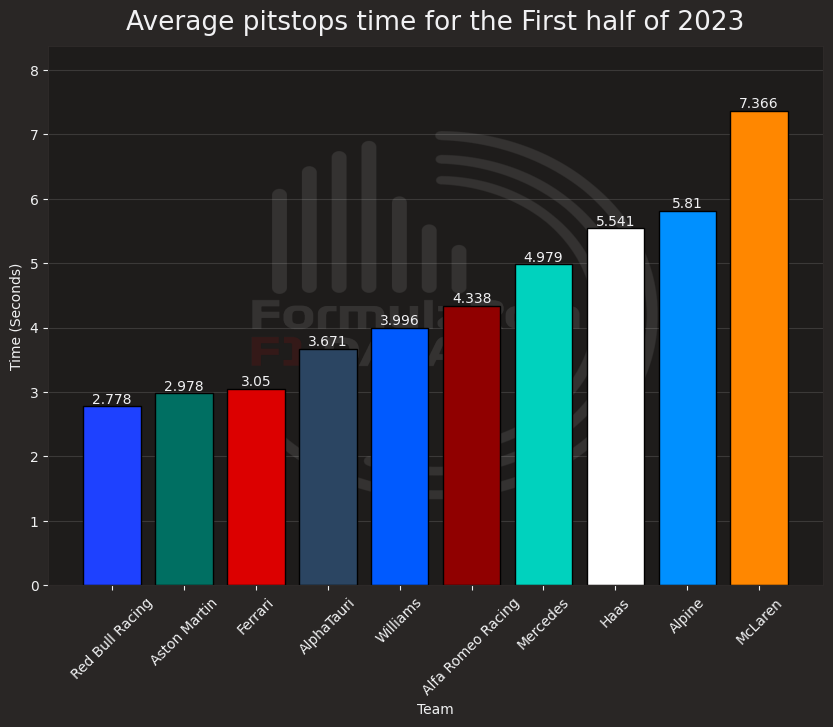

In [483]:
plt.figure(figsize=(10, 7))

# # Use a Seaborn style
# sns.set(style='Solarize_Light2')
# plt.style.use('dark_background')

x = pitstops["team"]
y = pitstops["Time"]
color = pitstops["color"]

# # Load the logo image
logo_img = mpimg.imread('logo/LogoFomulaRcmDark.png')

# Add the logo above the plot

plt.imshow(logo_img, extent=[0, len(x)-1,0, y.max()+1], aspect='auto', alpha=0.1, zorder=1)
 

# Create the bar plot
bars = plt.bar(x, y ,color = color, zorder=2)

# Add labels and title
plt.xlabel('Team')
plt.ylabel('Time (Seconds)')
plt.title('Average pitstops time for the First half of 2023')
# plt.yticks(range(300, 400, 5))
# plt.ylim(300, 340)
# # Add text annotations on top of bars

for i in range(len(x)):
    plt.text(i, y.loc[i], str(y.loc[i]), ha='center', va='bottom')
# Adding borders to the bars
for bar in bars:
    bar.set_edgecolor('black')
    bar.set_linewidth(1)

plt.xticks(rotation=45)

plt.grid(axis='y', alpha=0.2)

# Save the plot as an image file (e.g., PNG)
plt.savefig('Graphes/Other/avg_gap_pitstops.png', dpi=300 ,bbox_inches='tight')  # Change the filename and dpi as needed

# Display the plot
plt.show()



### team points over the season

In [484]:
constructor_results = pd.merge(constructor_results,results2023[["raceId","round"]].drop_duplicates(),on='raceId')

In [485]:
constructor_results = pd.merge(constructor_results,constructors.drop_duplicates(),on='constructorId')

In [486]:
constructor_results = pd.merge(constructor_results,constructor_color.drop_duplicates(),on='constructorId')

In [487]:
constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status,round,name,team,color
0,16670,1098,9,43.0,\N,1,Red Bull,Red Bull Racing,#1E41FF
1,16680,1099,9,44.0,\N,2,Red Bull,Red Bull Racing,#1E41FF
2,16690,1100,9,36.0,\N,3,Red Bull,Red Bull Racing,#1E41FF
3,16700,1101,9,57.0,\N,4,Red Bull,Red Bull Racing,#1E41FF
4,16710,1102,9,44.0,\N,5,Red Bull,Red Bull Racing,#1E41FF


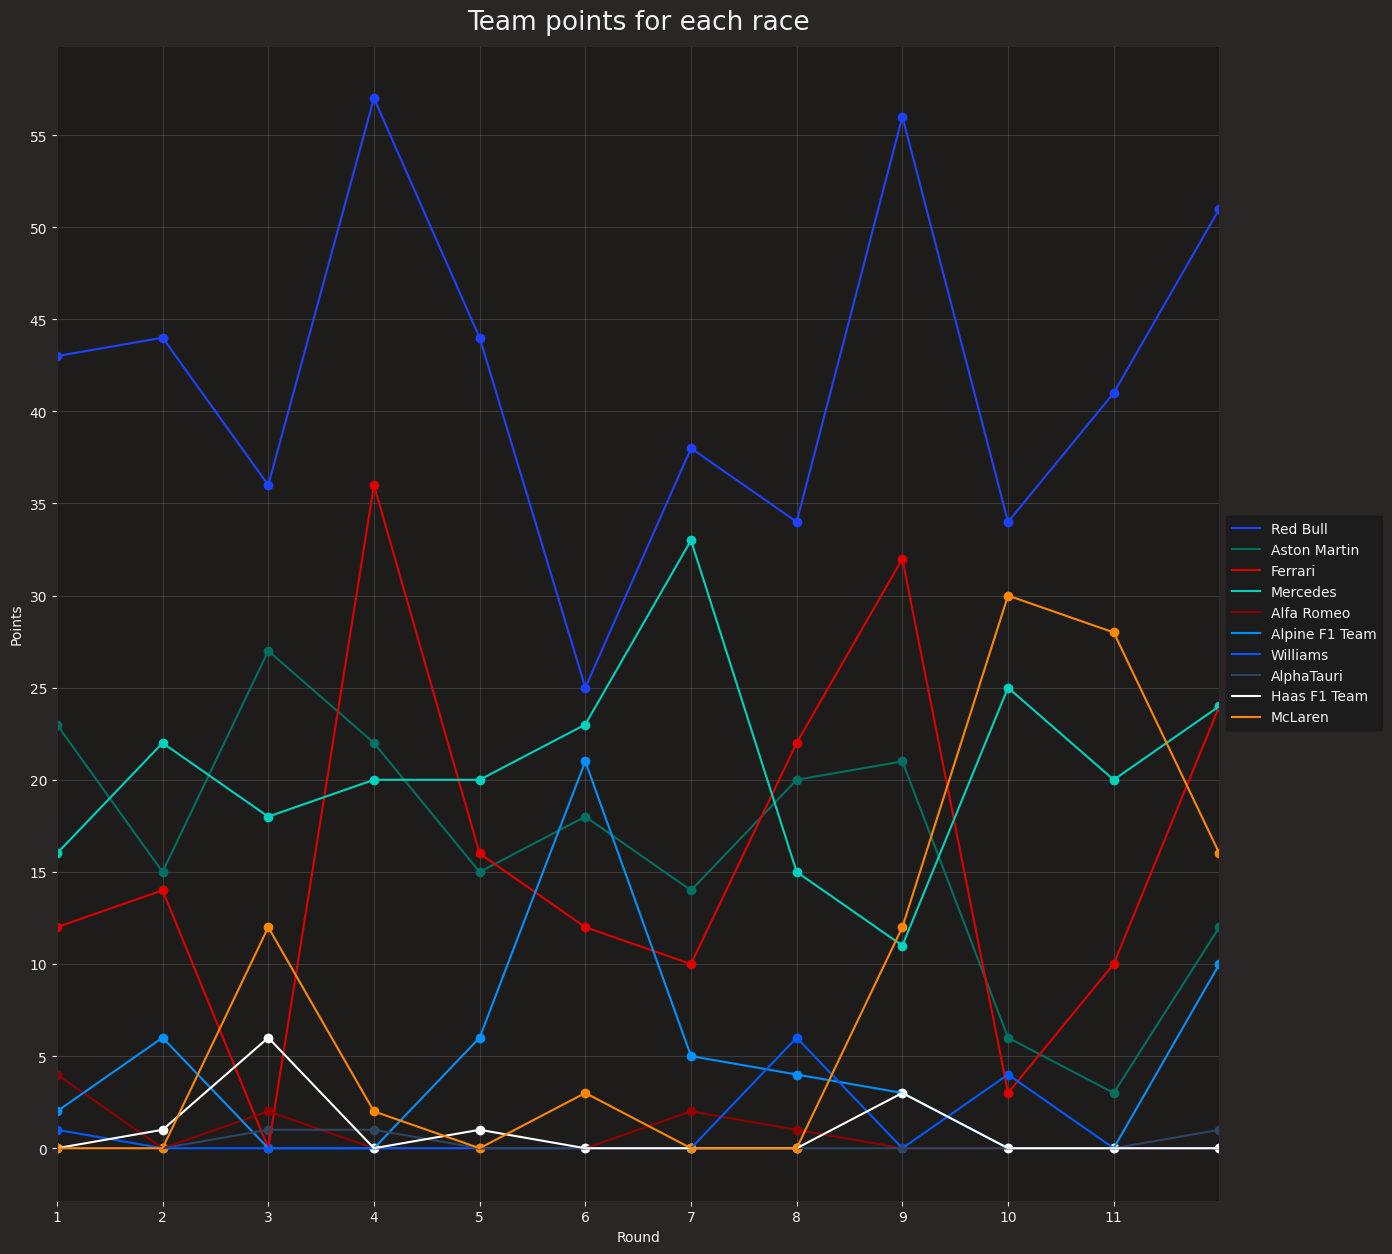

In [488]:
plt.subplots(figsize=(15, 15))


for i in constructor_results["name"].drop_duplicates():
    x = constructor_results.loc[constructor_results["name"]==i,"round"]
    y = constructor_results.loc[constructor_results["name"]==i,"points"]
    color = constructor_results.loc[constructor_results["name"]==i,"color"].values[0]
    plt.plot(x,y,color = color,label=i)
    plt.scatter(x,y,color = color)


# Add labels and title
plt.xlabel('Round')
plt.ylabel('Points')
plt.title('Team points for each race')
plt.xticks(range(0,12,1))
plt.xlim(1,12)

plt.yticks(range(0, 60, 5))
# # Add text annotations on top of bars

# for i in range(len(x)):
#     plt.text(i, y.loc[i], str(y.loc[i]), ha='center', va='bottom')
# # Adding borders to the bars
# for bar in bars:
#     bar.set_edgecolor('black')
#     bar.set_linewidth(1)

# plt.xticks(rotation=45)

plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.grid(True, alpha=0.2)

# Save the plot as an image file (e.g., PNG)
# plt.savefig('Graphes/Other/avg_gap_pitstops.png', dpi=300 ,bbox_inches='tight')  # Change the filename and dpi as needed

# Display the plot
plt.show()


### team points accumuler

In [489]:
constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status,round,name,team,color
0,16670,1098,9,43.0,\N,1,Red Bull,Red Bull Racing,#1E41FF
1,16680,1099,9,44.0,\N,2,Red Bull,Red Bull Racing,#1E41FF
2,16690,1100,9,36.0,\N,3,Red Bull,Red Bull Racing,#1E41FF
3,16700,1101,9,57.0,\N,4,Red Bull,Red Bull Racing,#1E41FF
4,16710,1102,9,44.0,\N,5,Red Bull,Red Bull Racing,#1E41FF


In [490]:
cons_rest_cuml = constructor_results

In [491]:
for i in cons_rest_cuml["name"].drop_duplicates():
    for j in range(2,13):
        cons_rest_cuml.loc[(cons_rest_cuml["name"]==i)&(cons_rest_cuml["round"]==j),"points"] = cons_rest_cuml.loc[(cons_rest_cuml["name"]==i)&(cons_rest_cuml["round"]==j),"points"].values[0] + cons_rest_cuml.loc[(cons_rest_cuml["name"]==i)&(cons_rest_cuml["round"]==j-1),"points"].values[0]

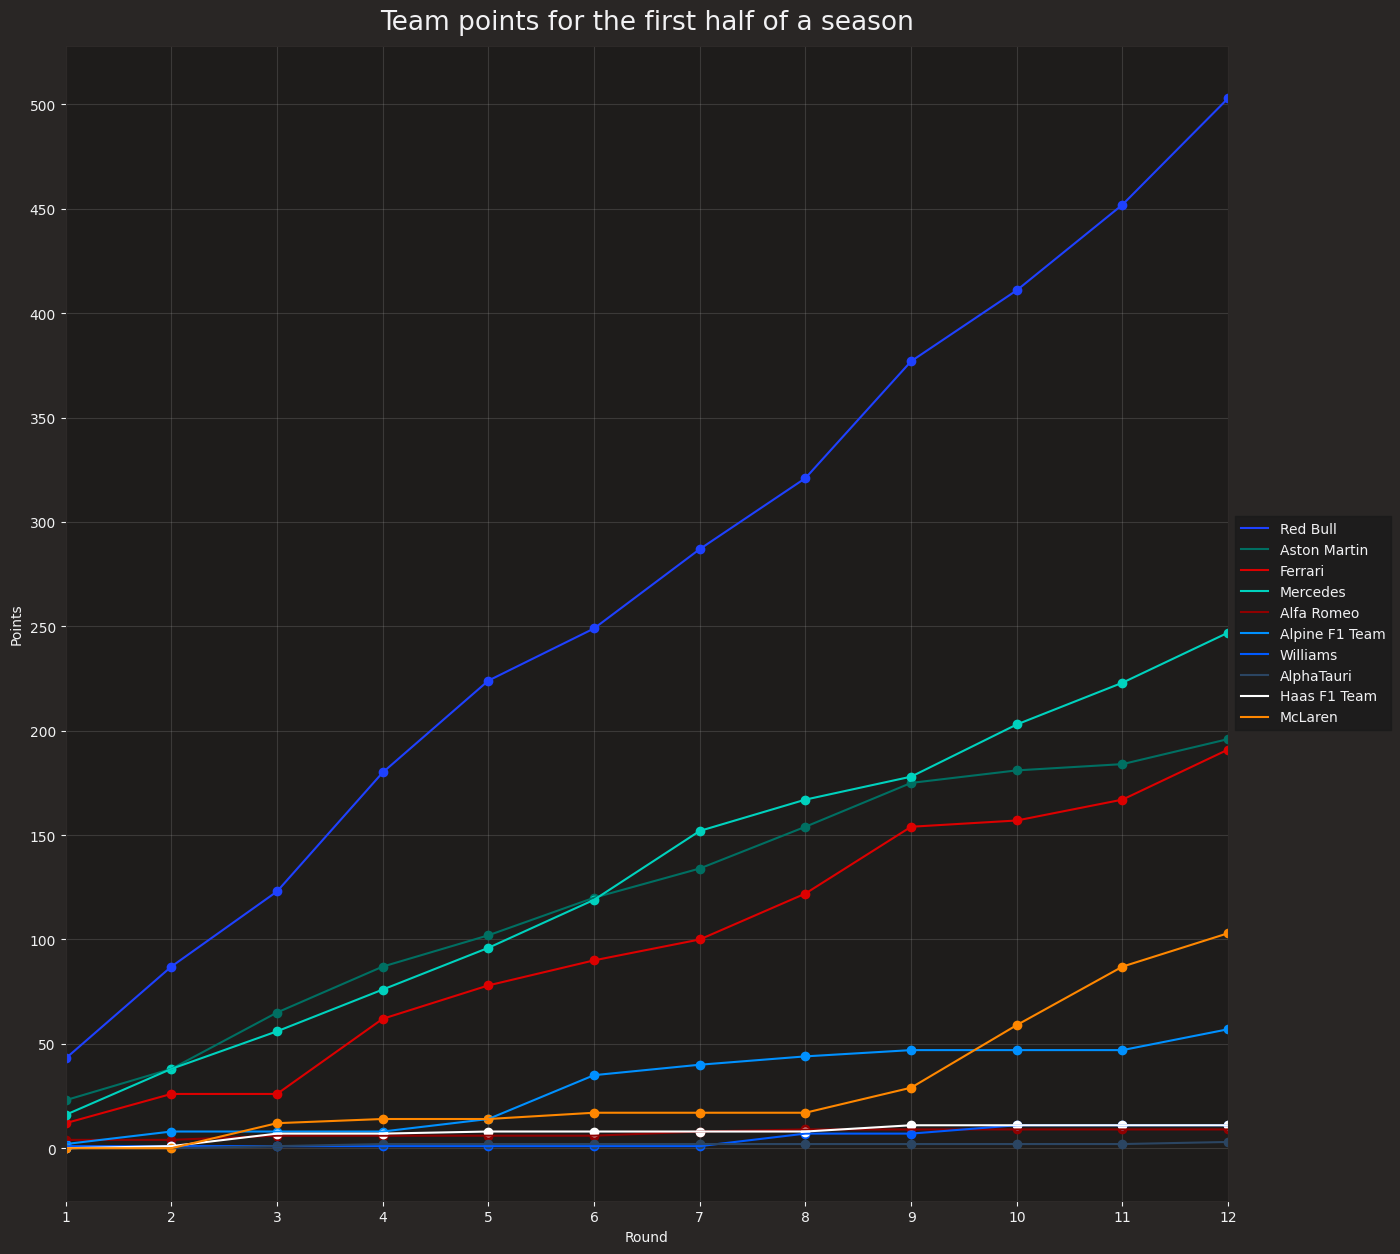

In [492]:
plt.subplots(figsize=(15, 15))


for i in cons_rest_cuml["name"].drop_duplicates():
    x = cons_rest_cuml.loc[cons_rest_cuml["name"]==i,"round"]
    y = cons_rest_cuml.loc[cons_rest_cuml["name"]==i,"points"]
    color = cons_rest_cuml.loc[cons_rest_cuml["name"]==i,"color"].values[0]
    plt.plot(x,y,color = color,label=i)
    plt.scatter(x,y,color = color)


# Add labels and title
plt.xlabel('Round')
plt.ylabel('Points')
plt.title('Team points for the first half of a season')
plt.xticks(range(0,13,1))
plt.xlim(1,12)

plt.yticks(range(0, 510, 50))
# # Add text annotations on top of bars

# for i in range(len(x)):
#     plt.text(i, y.loc[i], str(y.loc[i]), ha='center', va='bottom')
# # Adding borders to the bars
# for bar in bars:
#     bar.set_edgecolor('black')
#     bar.set_linewidth(1)

# plt.xticks(rotation=45)

plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.grid(True, alpha=0.2)

# Save the plot as an image file (e.g., PNG)
plt.savefig('Graphes/Other/team_points_cuml.png', dpi=300, bbox_inches='tight', transparent=True)  # Change the filename and dpi as needed

# Display the plot
plt.show()


### Points available 

In [493]:
total = cons_rest_cuml.loc[cons_rest_cuml["round"]== 12]["points"].sum()
total

1331.0

In [494]:
round12 = cons_rest_cuml.loc[cons_rest_cuml["round"]== 12]

In [495]:
round12["point%"] = (round12["points"]/ total)*100

C:\Users\GTR\AppData\Local\Temp\ipykernel_6888\894404379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  round12["point%"] = (round12["points"]/ total)*100


In [496]:
round12 = round12.sort_values("point%",ascending=False).reset_index()
round12['point%'] =  round12['point%'].apply(lambda x: round(x, 2))

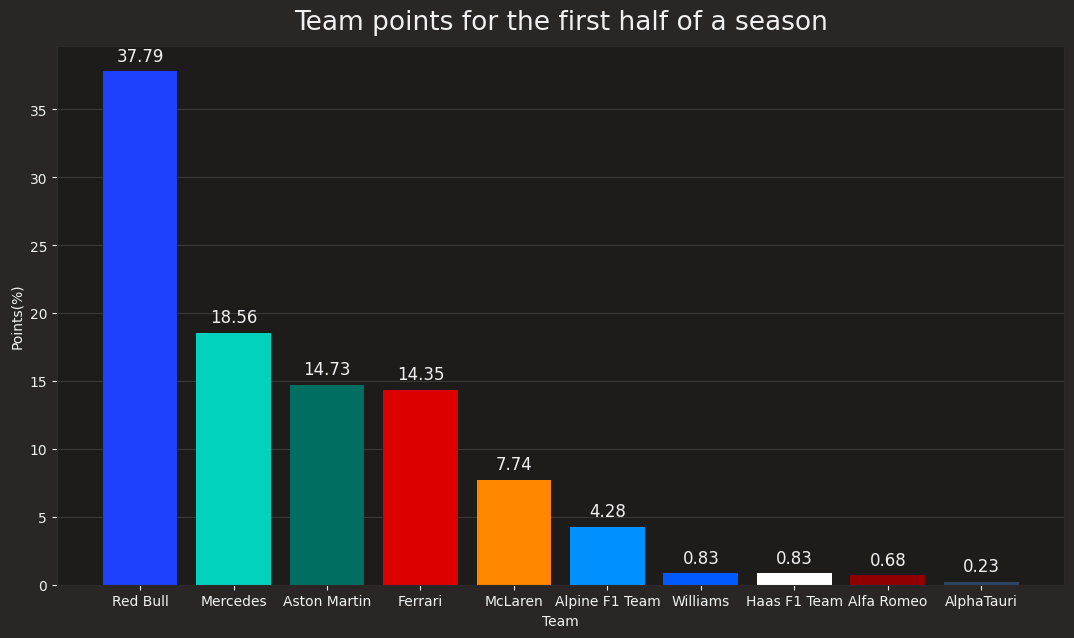

In [497]:
plt.subplots(figsize=(13, 7))


x = round12["name"]
y = round12["point%"]
color = round12["color"]
plt.bar(x,y,color = color,label=x)


# Add labels and title
plt.xlabel('Team')
plt.ylabel('Points(%)')
plt.title('Team points for the first half of a season')
# plt.xticks(range(0,13,1))
# plt.xlim(1,12)

# plt.yticks(range(0, 510, 50))

# # Add text annotations on top of bars
for i in range(len(x)):
    plt.text(i, y.loc[i]+0.5, str(y.loc[i]), ha='center', va='bottom', fontsize=12)



# Adding borders to the bars
for bar in bars:
    bar.set_edgecolor('black')
    bar.set_linewidth(1)

# plt.xticks(rotation=45)

# plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.grid(axis='y', alpha=0.2)

# Save the plot as an image file (e.g., PNG)
plt.savefig('Graphes/Other/team_points_%.png', dpi=300, bbox_inches='tight', transparent=True)  # Change the filename and dpi as needed

# Display the plot
plt.show()
